# Projeto 1

In [ ]:
import numpy as np

In [ ]:
# features
# Pelo longo?
# Perna curta?
# Faz au au?
porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]


# 1= porco, 0 = cachorro
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1,1,1,0,0,0] #labels / etiqueta

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([0])

In [ ]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

teste_x = [misterio1, misterio2, misterio3]
teste_y = [0,1,1]


In [ ]:
previsoes = model.predict(teste_x)

In [ ]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = corretos/total
print('Taxa de Acerto: ', taxa_de_acerto * 100)

Taxa de Acerto:  66.66666666666666


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
taxa_de_acerto = accuracy_score(teste_y, previsoes)
print('Taxa de Acerto: ', (taxa_de_acerto * 100).round(2) )

Taxa de Acerto:  66.67


# Projeto 2

In [ ]:
import pandas as pd

url = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(url)

dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [ ]:
mapa = {"home" : "principal",
        "how_it_works": "como_funciona",
        "contact" : "contato",
        "bought" : "comprou"
        }

dados = dados.rename(columns= mapa)

In [ ]:
x = dados[["principal","como_funciona", "contato"]]
y = dados["comprou"]

In [ ]:
dados.shape

(99, 4)

In [ ]:
treino_x = x[:75]
treino_y = y[:75]
teste_x = x[75:]
teste_y = y[75:]

In [ ]:
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

Treinaremos com 75 elementos e testaremos com 24 elementos


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acuracia foi de', acuracia.round(2),'%')

A acuracia foi de 95.83 %


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED, test_size = 0.25)
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi de', acuracia.round(2),'%')

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi de 96.0 %


In [ ]:
treino_y.value_counts()

0    47
1    27
Name: comprou, dtype: int64

In [ ]:
teste_y.value_counts()


0    19
1     6
Name: comprou, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED, test_size = 0.25, stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi de', acuracia.round(2),'%')

Treinaremos com 74 elementos e testaremos com 25 elementos
A acurácia foi de 96.0 %


# Projeto 3

In [ ]:
url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

dados = pd.read_csv(url)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
mapa = { "unfinished" : "nao_finalizado",
        "expected_hours" : "horas_esperadas",
        "price":"preco" }

dados = dados.rename(columns = mapa)

dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [ ]:
troca = {
    0 : 1,
    1 : 0
}

dados['finalizado'] = dados.nao_finalizado.map(troca)

dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


In [ ]:
dados.tail()

,nao_finalizado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


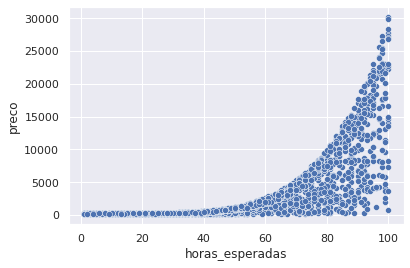

In [ ]:
import seaborn as sns
sns.set()
sns.scatterplot(x='horas_esperadas', y='preco', data=dados)

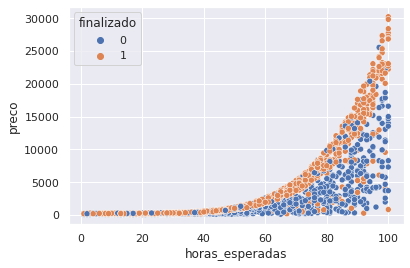

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', hue='finalizado', data=dados)


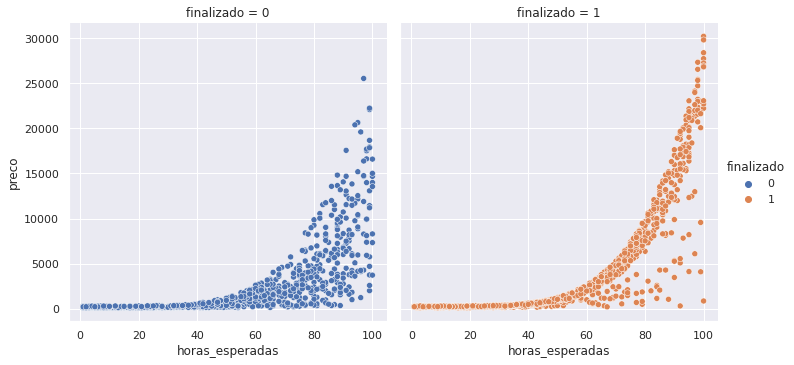

In [ ]:
sns.relplot(x='horas_esperadas', y='preco', hue = 'finalizado', col='finalizado', data=dados)


In [ ]:
x = dados[['horas_esperadas', 'preco']]

y = dados['finalizado']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state = SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 53.33%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
import numpy as np
previsoes_de_base = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_de_base) * 100
print("A acurácia da baseline foi %.2f%%" % acuracia)

A acurácia da baseline foi 52.59%


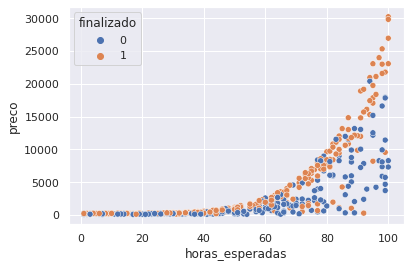

In [ ]:
sns.scatterplot(x='horas_esperadas', y='preco', hue=teste_y, data=teste_x)


In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min,x_max,y_min,y_max )

1 100 100 30223


In [ ]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [ ]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

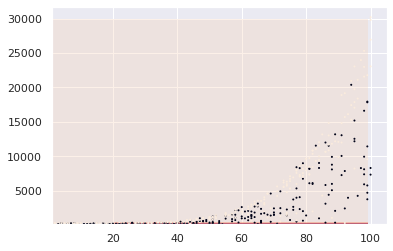

In [ ]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)

In [ ]:
from sklearn.svm import SVC
 
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
 
modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
 
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


In [ ]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
 
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
 
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
 
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
 
import matplotlib.pyplot as plt 

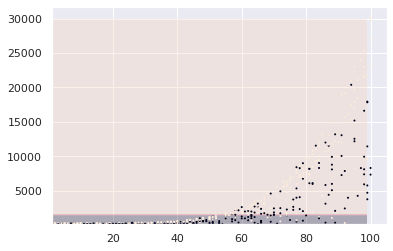

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=1)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
 
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
 
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


In [ ]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
 
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
 
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
 
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
 
import matplotlib.pyplot as plt 

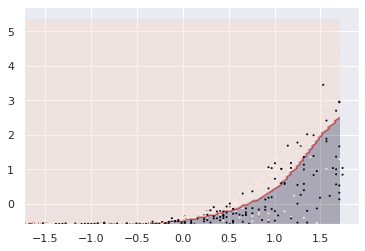

In [ ]:
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


# Projeto 4

In [ ]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(url)


In [ ]:
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
mapa = {
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'modelo_ano',
    'price' : 'preco',
    'sold': 'vendido'
}
dados = dados.rename(columns= mapa)
dados.head()

,Unnamed: 0,milhas_por_ano,modelo_ano,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
simounao = {
    'yes': 1,
    'no': 0
}
dados.vendido = dados.vendido.map(simounao)

dados.head()

,Unnamed: 0,milhas_por_ano,modelo_ano,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.modelo_ano


dados.head()

,Unnamed: 0,milhas_por_ano,modelo_ano,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [ ]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,modelo_ano,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [ ]:
dados = dados.drop(columns= ['Unnamed: 0','milhas_por_ano','modelo_ano' ], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [ ]:
x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi de 62.80%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print("A acurácia do dummy_stratified foi de %.2f%%" % acuracia)

A acurácia do dummy_stratified foi de 52.44%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100
print("A acurácia do dummy_mostfrequent foi de %.2f%%" % acuracia)

A acurácia do dummy_mostfrequent foi de 58.00%


In [ ]:
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
 
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
 
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))



modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)
 
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 79.28%


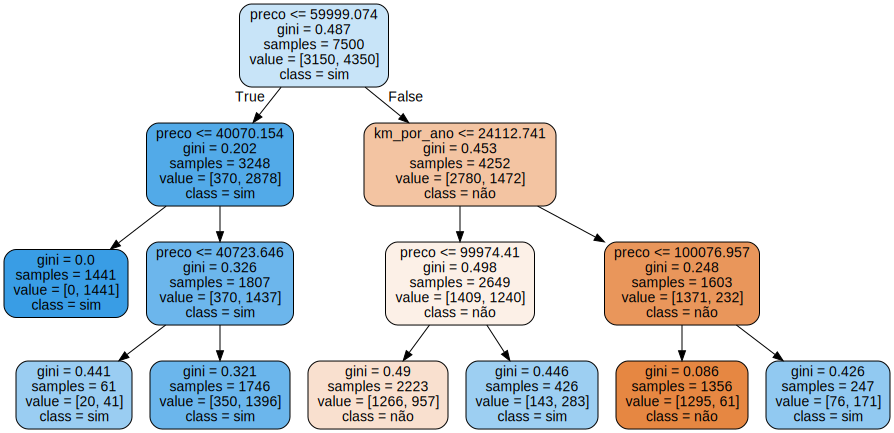

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, filled=True, rounded=True, feature_names=features, class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico